<a href="https://colab.research.google.com/github/MarvinLok/Practices/blob/main/Dummy_Variables_Interaction_Terms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is replicating the regression analysis in a video from zedstatistics, but using Python

https://www.youtube.com/watch?v=HSHcIHMxhbE&t=229s

In [62]:
from google.colab import files
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [63]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving dummy_variables_interaction_terms_practice_data.csv to dummy_variables_interaction_terms_practice_data (2).csv


Dependent varaibles:

Price: selling prices of car on secondary market


---


Independent variables:

Odometer: total distance the vehicle has traveled

Age categories: four categories (category 1 is the youngest, category 4 is the oldest)

Certificate: 1 stands for Yes, meaning the car is roadworthy and safe to drive



In [64]:
df

,ID,Price,Odometer,Age,Certificate
0,1,1000,30.298,AgeCat3,1
1,2,9000,19.647,AgeCat4,1
2,3,500,170.270,AgeCat4,0
3,4,3000,68.394,AgeCat2,1
4,5,9500,11.662,AgeCat1,0
...,...,...,...,...,...
95,96,3000,10.571,AgeCat3,1
96,97,4500,42.990,AgeCat2,1
97,98,1000,4.021,AgeCat3,0
98,99,10000,14.689,AgeCat1,1


In [65]:
df = df.drop('ID',axis=1)
df

,Price,Odometer,Age,Certificate
0,1000,30.298,AgeCat3,1
1,9000,19.647,AgeCat4,1
2,500,170.270,AgeCat4,0
3,3000,68.394,AgeCat2,1
4,9500,11.662,AgeCat1,0
...,...,...,...,...
95,3000,10.571,AgeCat3,1
96,4500,42.990,AgeCat2,1
97,1000,4.021,AgeCat3,0
98,10000,14.689,AgeCat1,1


Use dummy varaibles to represent Age categories rather than simply assigning value of 1,2,3,4 to each car. As the effect on price by shifting from category 1 to category 2 could be not the same as shifting from category 3 to category 4

In [66]:
df = pd.get_dummies(df)
df['Age_AgeCat1'] = df['Age_AgeCat1'].astype(int)
df['Age_AgeCat2'] = df['Age_AgeCat2'].astype(int)
df['Age_AgeCat3'] = df['Age_AgeCat3'].astype(int)
df['Age_AgeCat4'] = df['Age_AgeCat4'].astype(int)
df

,Price,Odometer,Certificate,Age_AgeCat1,Age_AgeCat2,Age_AgeCat3,Age_AgeCat4
0,1000,30.298,1,0,0,1,0
1,9000,19.647,1,0,0,0,1
2,500,170.270,0,0,0,0,1
3,3000,68.394,1,0,1,0,0
4,9500,11.662,0,1,0,0,0
...,...,...,...,...,...,...,...
95,3000,10.571,1,0,0,1,0
96,4500,42.990,1,0,1,0,0
97,1000,4.021,0,0,0,1,0
98,10000,14.689,1,1,0,0,0


In [67]:
X = df.iloc[:, 1]
y = df.iloc[:, 0]

There seems to be some inverse relation between price and odometer. We might log-transform both the value of price and odometer

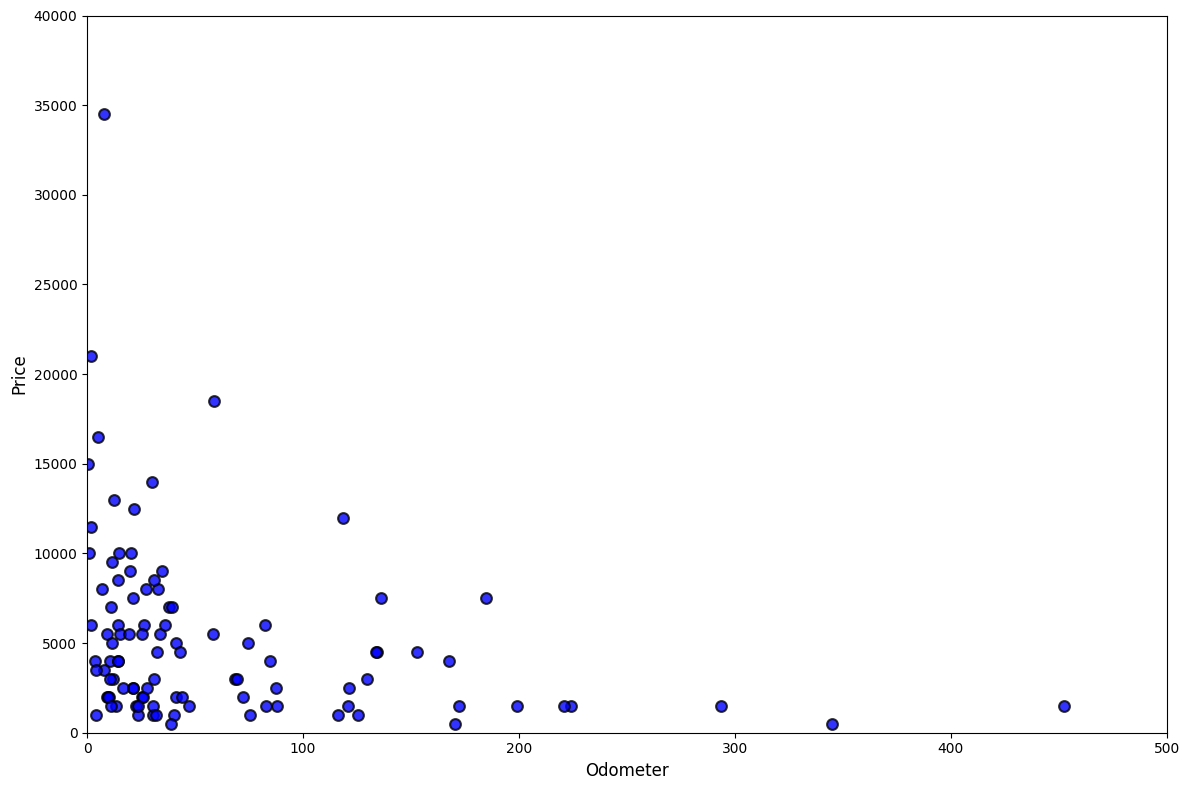

In [68]:
plt.figure(figsize=(12, 8))

plt.scatter(
    X,
    y,
    s=60,
    c='blue',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

plt.xlim(0, 500)
plt.ylim(0, 40000)
plt.xlabel(df.columns[1], fontsize=12)
plt.ylabel(df.columns[0], fontsize=12)
plt.tight_layout()

In [69]:
df["ln_price"] = np.log(df.iloc[:, 0])
df["ln_odometer"] = np.log(df.iloc[:, 1])
df

,Price,Odometer,Certificate,Age_AgeCat1,Age_AgeCat2,Age_AgeCat3,Age_AgeCat4,ln_price,ln_odometer
0,1000,30.298,1,0,0,1,0,6.907755,3.411082
1,9000,19.647,1,0,0,0,1,9.104980,2.977925
2,500,170.270,0,0,0,0,1,6.214608,5.137385
3,3000,68.394,1,0,1,0,0,8.006368,4.225285
4,9500,11.662,0,1,0,0,0,9.159047,2.456336
...,...,...,...,...,...,...,...,...,...
95,3000,10.571,1,0,0,1,0,8.006368,2.358114
96,4500,42.990,1,0,1,0,0,8.411833,3.760968
97,1000,4.021,0,0,0,1,0,6.907755,1.391531
98,10000,14.689,1,1,0,0,0,9.210340,2.687099


In [70]:
X = df.iloc[:, 8]
y = df.iloc[:, 7]

After log-transformation, price and odometer are more linearly associated visually

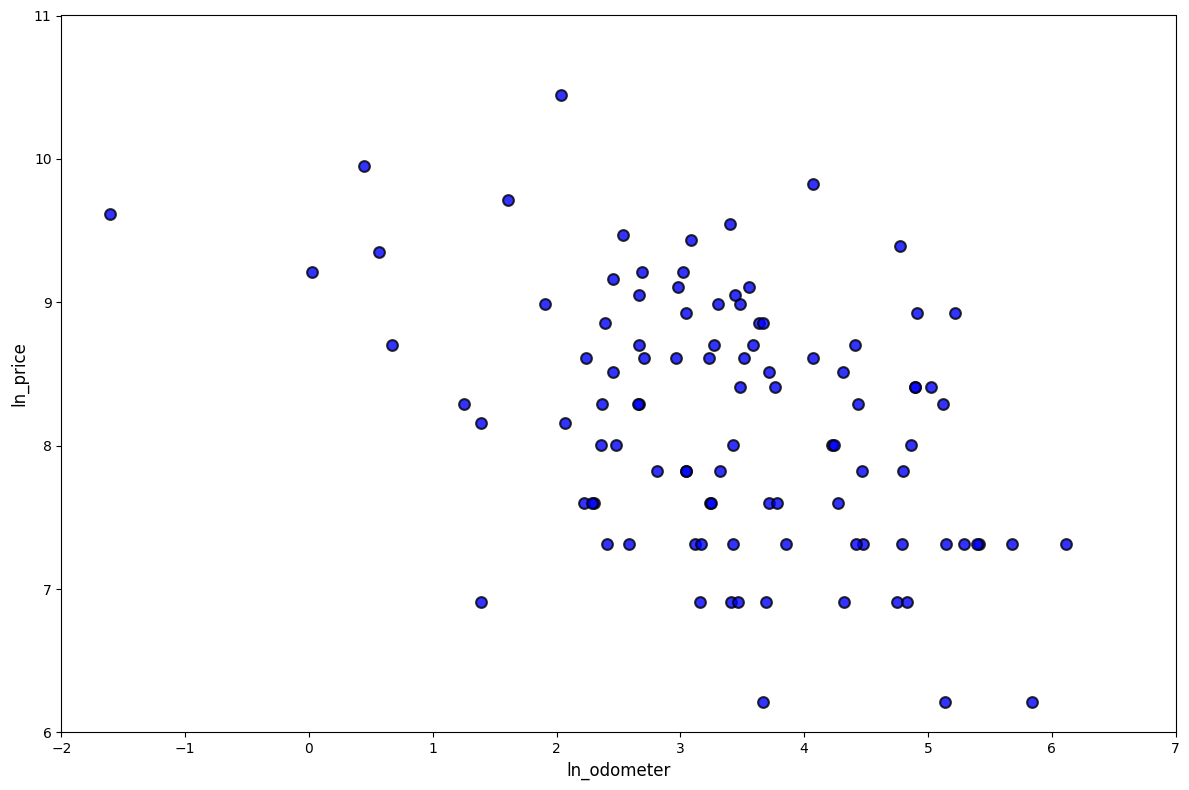

In [71]:
plt.figure(figsize=(12, 8))

plt.scatter(
    X,
    y,
    s=60,
    c='blue',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

plt.xlim(-2, 7)
plt.ylim(6, 11)
plt.xlabel(df.columns[8], fontsize=12)
plt.ylabel(df.columns[7], fontsize=12)
plt.tight_layout()

Use a new set of independent variables and ln_price as the new response

Use Age category 1 as the base to avoid dummy variable trap

In [72]:
independent_variables = ['Age_AgeCat2', 'Age_AgeCat3','Age_AgeCat4', 'ln_odometer','Certificate']
dependent_variables = ['ln_price']
X = df[independent_variables]
y = df[dependent_variables]

In [73]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [74]:
def format_excel_output(results):

  coef_df = pd.DataFrame({
      'Coefficients': results.params,
      'Standard Error': results.bse,
      't-stat': results.tvalues,
      'p-value': results.pvalues
  })

  coef_df['Significance'] = coef_df['p-value'].apply(
      lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
  )

  model_stats = pd.DataFrame({
      'Metric': ['R-squared', 'Adj. R-squared', 'Observations'],
      'Value': [
          results.rsquared,
          results.rsquared_adj,
          results.nobs
      ]
  }).set_index('Metric')

  return coef_df, model_stats


In [75]:
coef_table, stats_table = format_excel_output(results)
print("="*60)
print("Coefficients")
print("="*60)
print(coef_table.round(5))
print("\n" + "="*60)
print("Regression Statistics")
print("="*60)
print(stats_table.round(5))
print("\n" + "="*60)
print("Significance: *** p<0.001, ** p<0.01, * p<0.05")
print("="*60)

Coefficients
             Coefficients  Standard Error    t-stat  p-value Significance
const             8.94839         0.27930  32.03811  0.00000          ***
Age_AgeCat2      -0.12927         0.24725  -0.52284  0.60231             
Age_AgeCat3      -0.73339         0.26153  -2.80426  0.00613           **
Age_AgeCat4       0.47363         0.32632   1.45143  0.14999             
ln_odometer      -0.22461         0.06170  -3.64034  0.00045          ***
Certificate       0.34426         0.17355   1.98362  0.05022             

Regression Statistics
                    Value
Metric                   
R-squared         0.39192
Adj. R-squared    0.35957
Observations    100.00000

Significance: *** p<0.001, ** p<0.01, * p<0.05


Interaction term = Age Category 4 * Certificate

Add an interaction term as Age category is affecting the relationship between price and Certificate.

A vintage car which is able to drive gives the car additional value (i.e. espeically appealing), the additional value could be captured by the interaction term

In [76]:
df["Interaction"] = df.iloc[:, 2] * df.iloc[:, 6]
df

,Price,Odometer,Certificate,Age_AgeCat1,Age_AgeCat2,Age_AgeCat3,Age_AgeCat4,ln_price,ln_odometer,Interaction
0,1000,30.298,1,0,0,1,0,6.907755,3.411082,0
1,9000,19.647,1,0,0,0,1,9.104980,2.977925,1
2,500,170.270,0,0,0,0,1,6.214608,5.137385,0
3,3000,68.394,1,0,1,0,0,8.006368,4.225285,0
4,9500,11.662,0,1,0,0,0,9.159047,2.456336,0
...,...,...,...,...,...,...,...,...,...,...
95,3000,10.571,1,0,0,1,0,8.006368,2.358114,0
96,4500,42.990,1,0,1,0,0,8.411833,3.760968,0
97,1000,4.021,0,0,0,1,0,6.907755,1.391531,0
98,10000,14.689,1,1,0,0,0,9.210340,2.687099,0


In [77]:
independent_variables = ['Age_AgeCat2', 'Age_AgeCat3','Age_AgeCat4', 'ln_odometer','Certificate','Interaction']
dependent_variables = ['ln_price']
X = df[independent_variables]
y = df[dependent_variables]
X

,Age_AgeCat2,Age_AgeCat3,Age_AgeCat4,ln_odometer,Certificate,Interaction
0,0,1,0,3.411082,1,0
1,0,0,1,2.977925,1,1
2,0,0,1,5.137385,0,0
3,1,0,0,4.225285,1,0
4,0,0,0,2.456336,0,0
...,...,...,...,...,...,...
95,0,1,0,2.358114,1,0
96,1,0,0,3.760968,1,0
97,0,1,0,1.391531,0,0
98,0,0,0,2.687099,1,0


In [78]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

Interpret the results

---
Controlling for other variables,

1% increase in Odometer decreases the price by 0.209%

A car in age category 2 will require a price 18% lower than a car in age category 1 on average

For a car not in age category 4, having a certificate increases the price by 12.3% on average

For a car in age category 4, having a certificate increases the price by (137% + 12.3%) = 149% on average


In [79]:
coef_table, stats_table = format_excel_output(results)
print("="*60)
print("Coefficients")
print("="*60)
print(coef_table.round(5))
print("\n" + "="*60)
print("Regression Statistics")
print("="*60)
print(stats_table.round(5))
print("\n" + "="*60)
print("Significance: *** p<0.001, ** p<0.01, * p<0.05")
print("="*60)

Coefficients
             Coefficients  Standard Error    t-stat  p-value Significance
const             9.12518         0.27423  33.27548  0.00000          ***
Age_AgeCat2      -0.18063         0.23779  -0.75962  0.44941             
Age_AgeCat3      -0.80029         0.25185  -3.17766  0.00202           **
Age_AgeCat4      -0.39015         0.42371  -0.92079  0.35954             
ln_odometer      -0.20949         0.05940  -3.52690  0.00066          ***
Certificate       0.12298         0.18185   0.67630  0.50053             
Interaction       1.37079         0.45317   3.02489  0.00322           **

Regression Statistics
                    Value
Metric                   
R-squared         0.44638
Adj. R-squared    0.41067
Observations    100.00000

Significance: *** p<0.001, ** p<0.01, * p<0.05
